In [3]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from PIL import Image
import glob
import matplotlib.pyplot as plt

/Applications/anaconda3/envs/trocr/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Applications/anaconda3/envs/trocr/lib/python3.10/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/Applications/anaconda3/envs/trocr/lib/python3.10/site-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/Applications/anaconda3/envs/trocr/lib/python3.10/site-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._

In [4]:
processor = TrOCRProcessor.from_pretrained('medieval-data/trocr-medieval-base')
model = VisionEncoderDecoderModel.from_pretrained('medieval-data/trocr-medieval-base')

/Applications/anaconda3/envs/trocr/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [5]:
image_files = glob.glob("lines/*")

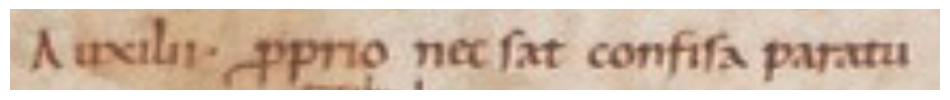

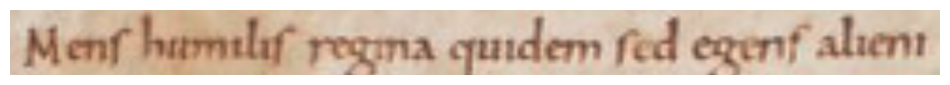

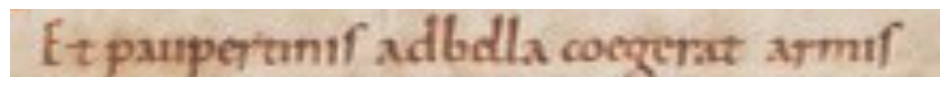

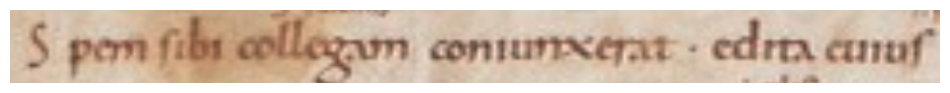

In [6]:
for line in image_files:
    image = Image.open(line).convert("RGB")
    plt.figure(figsize=(12, 6))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

/Applications/anaconda3/envs/trocr/lib/python3.10/site-packages/transformers/generation/utils.py:1473: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use and modify the model generation configuration (see https://huggingface.co/docs/transformers/generation_strategies#default-text-generation-configuration )
  warnings.warn(


Auxili. ꝓprio nec sat confisa paratu


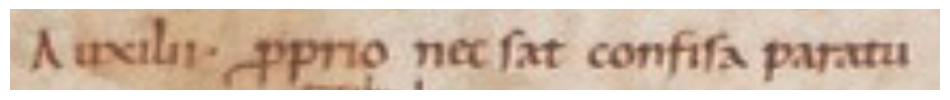

Mens humilis regina quidem sed egens alieni


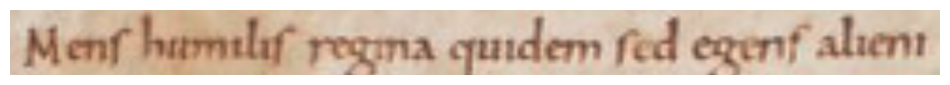

Et paupertinis ad bella cogerat armis


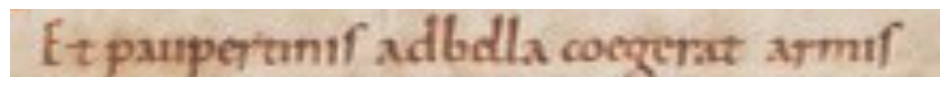

Spem sibi colllegam conumxerat. cdita cuius


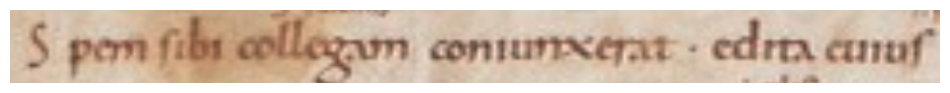

In [7]:
for line in image_files:
    image = Image.open(line).convert("RGB")
    pixel_values = processor(images=image, return_tensors="pt").pixel_values

    generated_ids = model.generate(pixel_values)
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
    print(generated_text)
    plt.figure(figsize=(12, 6))
    plt.imshow(image)
    plt.axis('off')  # Turn off axis numbers and ticks
    plt.show()